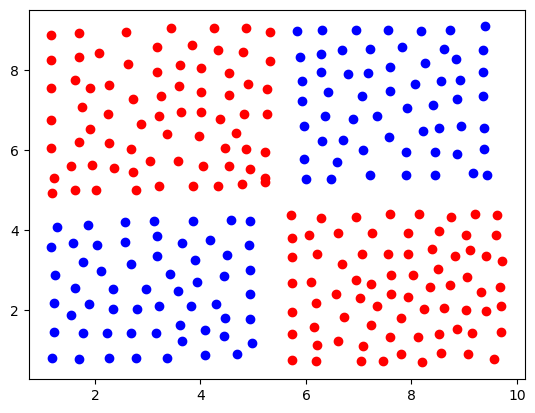

In [8]:
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

data1 = sio.loadmat('data_Week6_class1_XOR.mat')
data2 = sio.loadmat('data_Week6_class2_XOR.mat')

data1 = data1['data_Week6_class1_XOR']
data2 = data2['data_Week6_class2_XOR']


plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()

In [9]:
data = np.vstack((data1, data2))
#print(data)
target1 = np.ones((np.shape(data1)[0], 1))
target2 = 0*np.ones((np.shape(data2)[0], 1))
targets = np.vstack((target1, target2))
#print(data)

In [10]:
from sklearn.neural_network import MLPClassifier

# generating the grid
x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])
x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)
xx1, xx2 = np.meshgrid(x1, x2)

data_grid = np.vstack((xx1.flatten(), xx2.flatten())).T
#print(x1)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(1, ), 
                    activation='identity',
                    solver = 'lbfgs',
                    max_iter=1000,
                    random_state=42)

mlp.fit(data, np.squeeze(targets.reshape(-1,1)))
prediction = mlp.predict(data_grid)

print(mlp.loss_)

0.6865728949235157


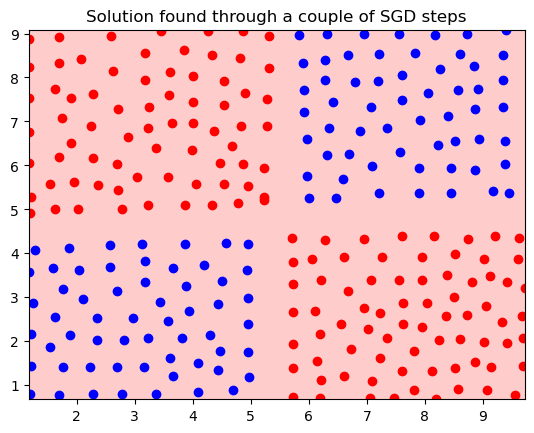

In [12]:
plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)), \
             alpha = 0.2, cmap =cm_bright)


plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.title('Solution found through a couple of SGD steps')
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


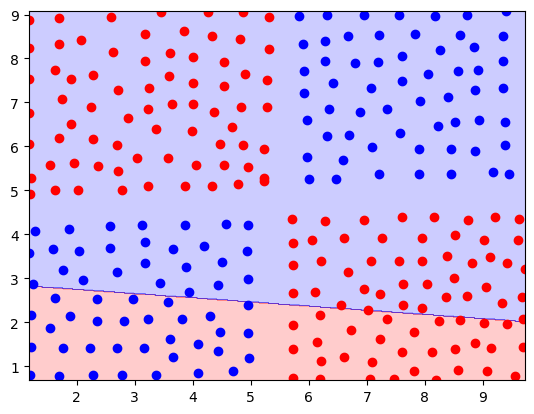

In [13]:
# two neurons with linear activation

my_model = MLPClassifier(hidden_layer_sizes = (2,), activation = 'identity')
my_model.fit(data, np.squeeze(targets.reshape(-1,1)))
prediction = my_model.predict(data_grid)

plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)), \
             alpha = 0.2, cmap =cm_bright)


plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()

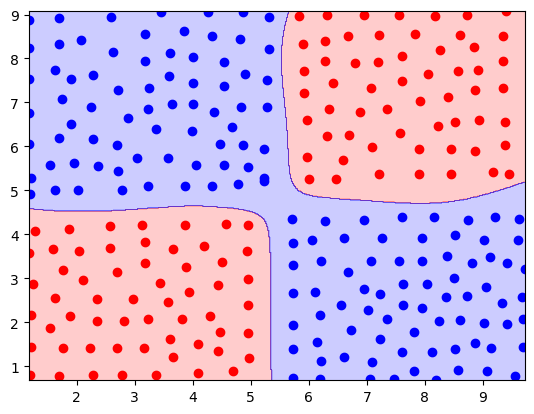

In [14]:
my_model = MLPClassifier(hidden_layer_sizes = (10,10), \
                         activation = 'logistic', 
                         solver = 'lbfgs', max_iter=100000, alpha=.1)

my_model.fit(data, np.squeeze(targets.reshape(-1,1)))
prediction = my_model.predict(data_grid)

plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)), \
             alpha = 0.2, cmap =cm_bright)


plt.scatter(data1[:,0], data1[:,1], c= 'b')
plt.scatter(data2[:,0], data2[:,1], c= 'r')
plt.show()

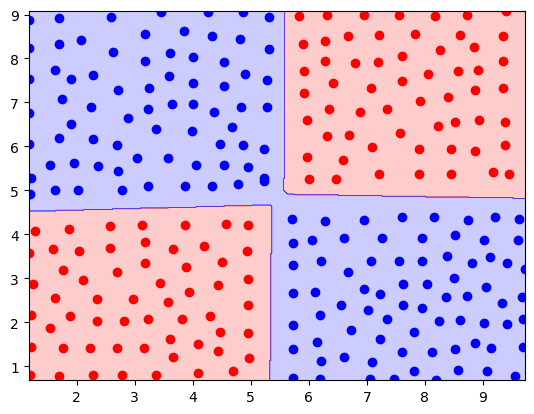

In [15]:
my_model = MLPClassifier(hidden_layer_sizes = (10,10), \
                         activation = 'relu', 
                         solver = 'lbfgs', max_iter=100000, alpha=.1)

my_model.fit(data, np.squeeze(targets.reshape(-1,1)))
prediction = my_model.predict(data_grid)

plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)), \
             alpha = 0.2, cmap =cm_bright)


plt.scatter(data1[:,0], data1[:,1], c= 'b')
plt.scatter(data2[:,0], data2[:,1], c= 'r')
plt.show()